# Hotels EDA

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Load in data

In [6]:
# load in hotel dictionary data as dataframe
hotel_datasets = [file for file in os.listdir('data/') if 'Details_' in file]
df_hotel_dict = pd.DataFrame()
for dataset in hotel_datasets:
    df_dataset = pd.read_csv('data/' + dataset)
    df_hotel_dict = pd.concat([df_hotel_dict, df_dataset], ignore_index=True)

# drop duplicates
df_hotel_dict.drop_duplicates(inplace=True)

### EDA

In [11]:
# total no. hotels
len(df_hotel_dict)

1923

In [7]:
# create num english reviews count and approximate time to scrape reviews column
df_hotel_dict['num_reviews_english'] = df_hotel_dict.top_lang_reviews.apply(lambda x: eval(x)['English'])
df_hotel_dict['approx_time_scrape_hrs'] = (df_hotel_dict.num_reviews_english / 5 * 20)/3600

In [8]:
# pcnt of total hotel reviews in english
df_hotel_dict.num_reviews_english.sum()/df_hotel_dict.num_reviews.sum()

0.8024205808125556

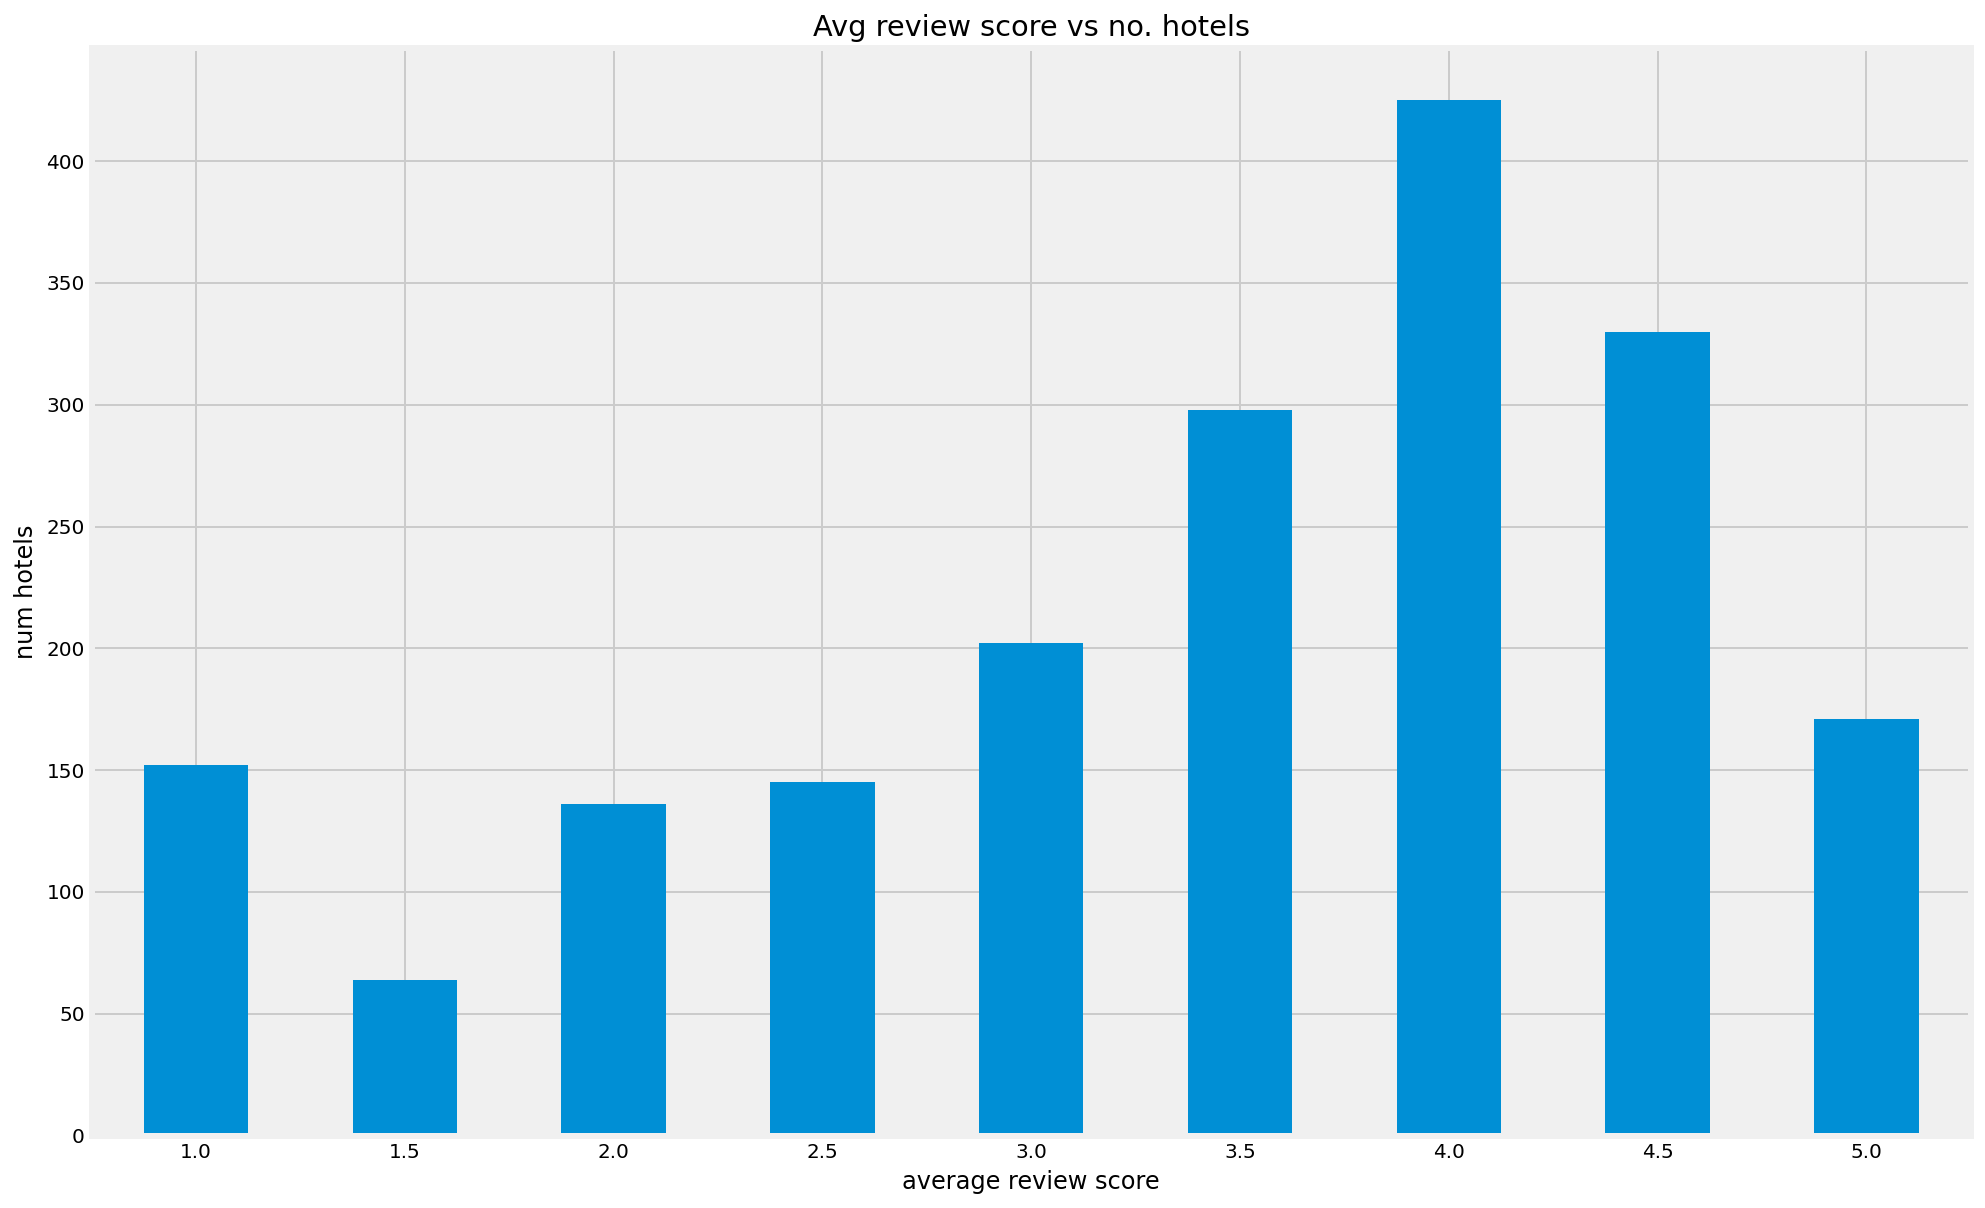

In [12]:
# plot bar chrt - no. hotels by average review score
df_hotel_dict.avg_review_score.value_counts().sort_index().plot(kind='bar', figsize=(15, 10));
plt.title('Avg review score vs no. hotels')
plt.xlabel('average review score')
plt.ylabel('num hotels')
plt.xticks(rotation=0)
plt.show()

In [14]:
# overall average score
(df_hotel_dict.avg_review_score * df_hotel_dict.num_reviews).sum()/df_hotel_dict.num_reviews.sum()

4.01367021008709

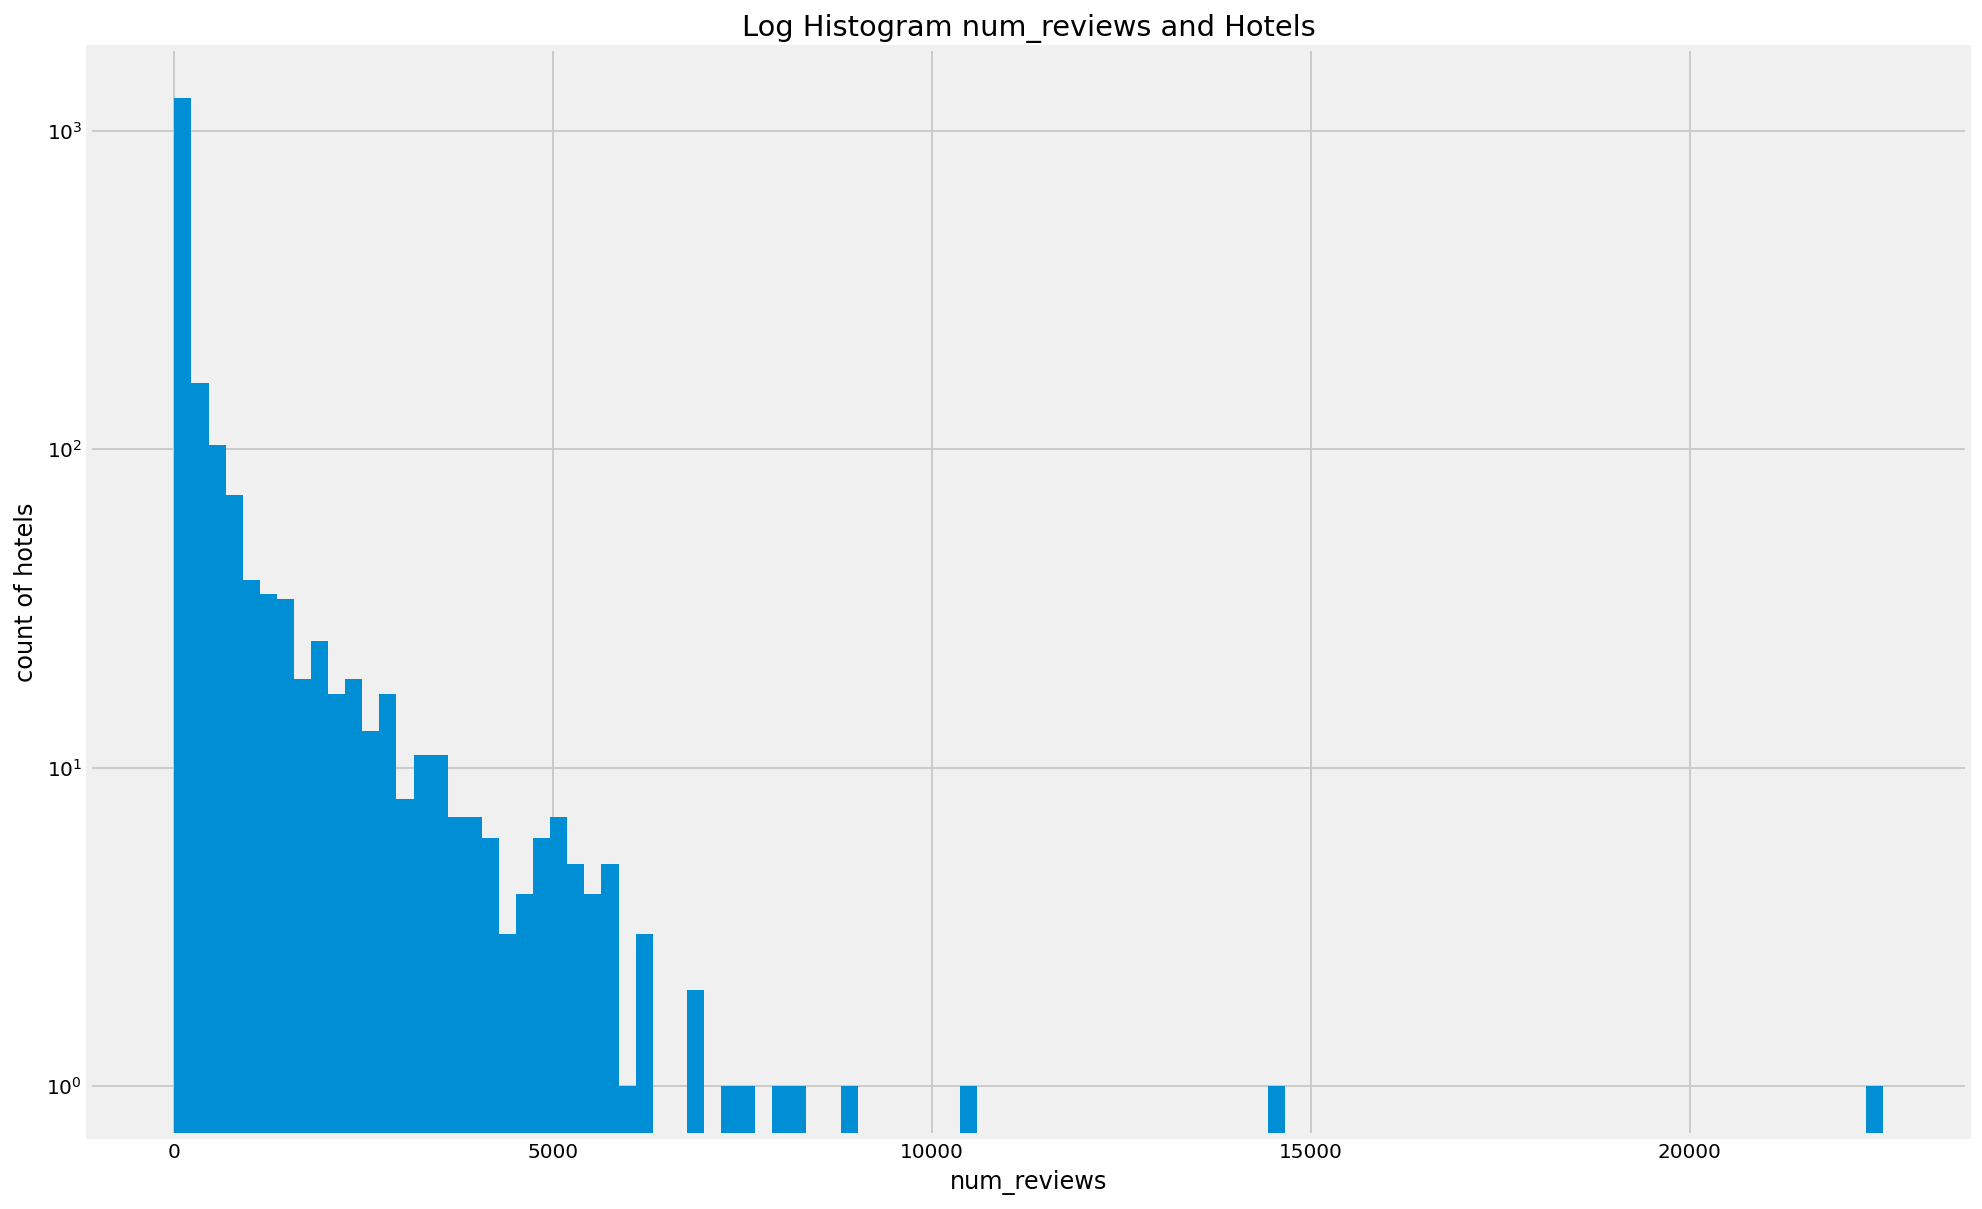

In [13]:
# plot histogram num_reviews per hotel
plt.figure(figsize=(15, 10))
plt.hist(df_hotel_dict.num_reviews, bins=100)
plt.title('Log Histogram num_reviews and Hotels')
plt.xlabel('num_reviews')
plt.ylabel('count of hotels')
plt.yscale('log')
plt.show()

In [24]:
# total number of reviews
sum(df_hotel_dict.num_reviews)

1072222

In [25]:
# selection of 'outliers' - hotels > 8000 reviews
df_hotel_dict[df_hotel_dict.num_reviews>8000]

,Unnamed: 0,link,hotel_name,address,star_rating,avg_review_score,avg_review_score_breakdown,hotel_description,hotel_style,location_details,location_amenities,hotel_review_number,num_reviews,num_review_breakdown,top_lang_reviews,extra_details,num_reviews_english,approx_time_scrape_hrs
6,6,/Hotel_Review-g186338-d193097-Reviews-The_Towe...,"The Tower Hotel Reviews, London","St Katharine's Way, London E1W 1LD England",4.0,4.0,"{'Location': 4.5, 'Cleanliness': 4.0, 'Service...",The Tower Hotel is nestled between the River T...,"['', 'Great View', 'Marina View', 'English, Fr...","['100Great for walkersGrade: 100 out of 100', ...","Paid private parking on-site, Free High Speed ...","#382 of 1,167 hotels in London",10528,None,"{'All languages': 10532, 'English': 9245, 'Fre...",['£95 - £233 (Based on Average Rates for a Sta...,9245,10.272222
7,7,/Hotel_Review-g186338-d1657415-Reviews-Park_Pl...,Park Plaza Westminster Bridge London Hotel Rev...,"200 Westminster Bridge Road, London SE1 7UT En...",4.0,4.5,"{'Location': 5.0, 'Cleanliness': 4.5, 'Service...",Situated opposite Big Ben and the Houses of Pa...,"['', 'Great View', 'Business', 'English, Frenc...","['100Great for walkersGrade: 100 out of 100', ...","Parking, Free internet, Pool, Fitness Centre w...","#358 of 1,167 hotels in London",22545,None,"{'All languages': 22546, 'English': 17689, 'Sp...",['£118 - £247 (Based on Average Rates for a St...,17689,19.654444
30,30,/Hotel_Review-g186338-d193112-Reviews-Strand_P...,"Strand Palace Hotel Reviews, London","372 Strand, London WC2R 0JJ England",4.0,4.0,"{'Location': 5.0, 'Cleanliness': 4.5, 'Service...",Strand Palace is surrounded by the best London...,"['', 'Centrally Located', 'Classic', 'English,...","['100Great for walkersGrade: 100 out of 100', ...","Free High Speed Internet (WiFi), Fitness Centr...","#550 of 1,167 hotels in London",14430,None,"{'All languages': 14430, 'English': 12685, 'Ch...",['£129 - £220 (Based on Average Rates for a St...,12685,14.094444
82,82,/Hotel_Review-g186338-d199872-Reviews-Melia_Wh...,"Melia White House Hotel Reviews, London","Albany Street, Regent's Park, London NW1 3UP E...",None,4.0,"{'Location': 4.5, 'Cleanliness': 4.5, 'Service...",The Melia White House hotel was built in 1936 ...,"['English, Spanish']","['100Great for walkersGrade: 100 out of 100', ...","Free High Speed Internet (WiFi), Bar / lounge,...","#474 of 1,167 hotels in London",8915,None,"{'All languages': 8916, 'English': 4669, 'Span...",['£120 - £347 (Based on Average Rates for a St...,4669,5.187778
469,70,/Hotel_Review-g186338-d193138-Reviews-Copthorn...,Copthorne Tara Hotel London Kensington Reviews,Scarsdale Place Kensington - W8 5SY Kensington...,4.0,3.5,"{'Location': 4.5, 'Cleanliness': 4.0, 'Service...",The Copthorne Tara Hotel offers the ideal loca...,"['', 'Mid-range', 'English, Arabic, German, It...","['100Great for walkersGrade: 100 out of 100', ...","Paid private parking on-site, Free internet, F...","#561 of 1,167 hotels in London",8132,None,"{'All languages': 8132, 'English': 7157, 'Chin...",['£78 - £146 (Based on Average Rates for a Sta...,7157,7.952222


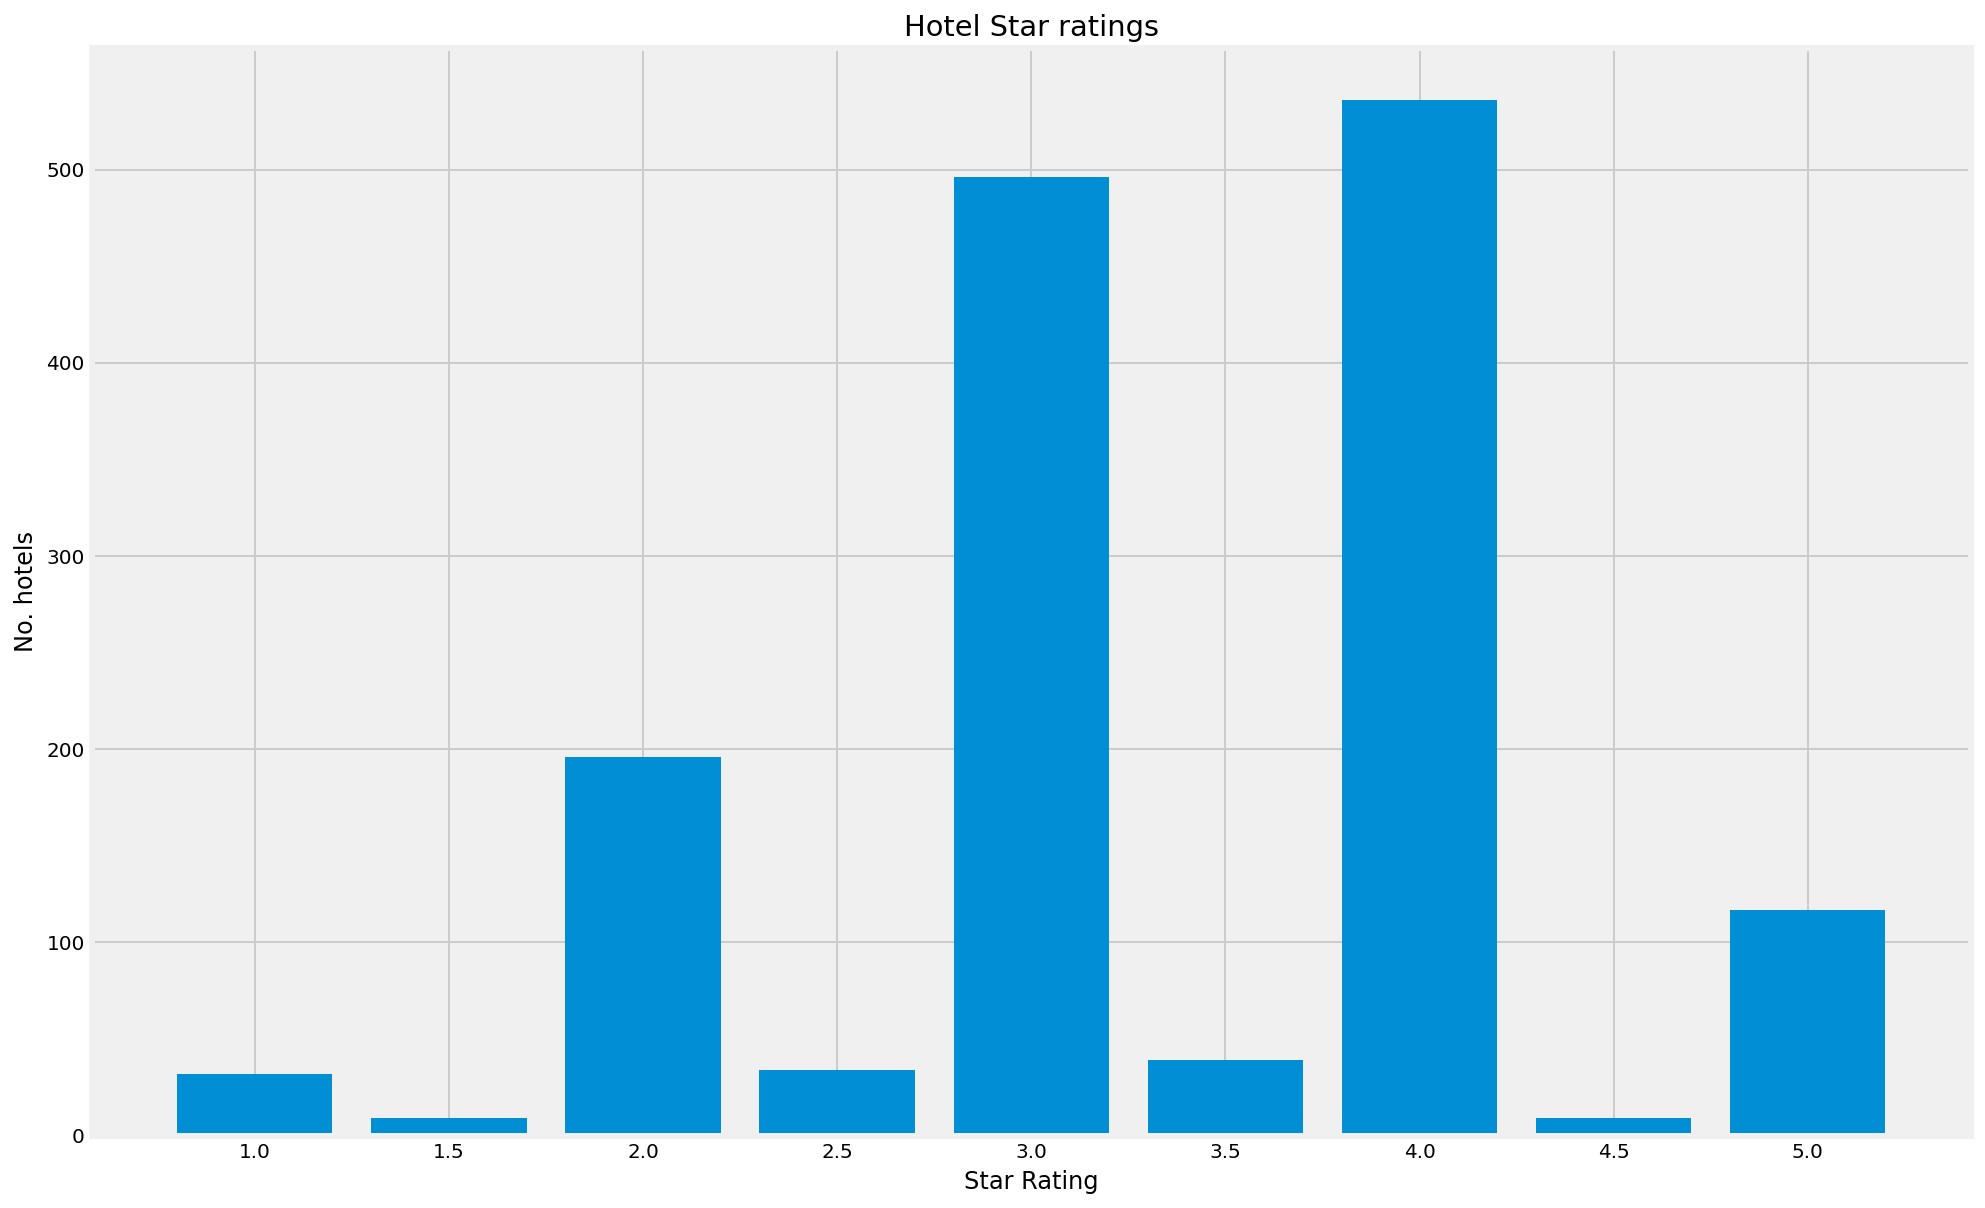

In [15]:
# bar-chart of num of hotels per star ratings
plt.figure(figsize=(15, 10))
hotel_stars_count = df_hotel_dict.star_rating[df_hotel_dict.star_rating != 'None'].value_counts().sort_index()
plt.bar(hotel_stars_count.index, hotel_stars_count.values)
plt.title('Hotel Star ratings')
plt.xlabel('Star Rating')
plt.ylabel('No. hotels')
plt.show()

In [17]:
# create average room rate column
def avg_room_rate(x):
    list_x = eval(x)
    for i in range(len(list_x)):
        if '£' in list_x[i]:
            return np.mean([int(val) for val in list_x[i].replace('£', '').split() if val.isnumeric()])
    return np.nan

df_hotel_dict['avg_room_rate'] = df_hotel_dict.extra_details.apply(avg_room_rate)

C:\Users\mqsil\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


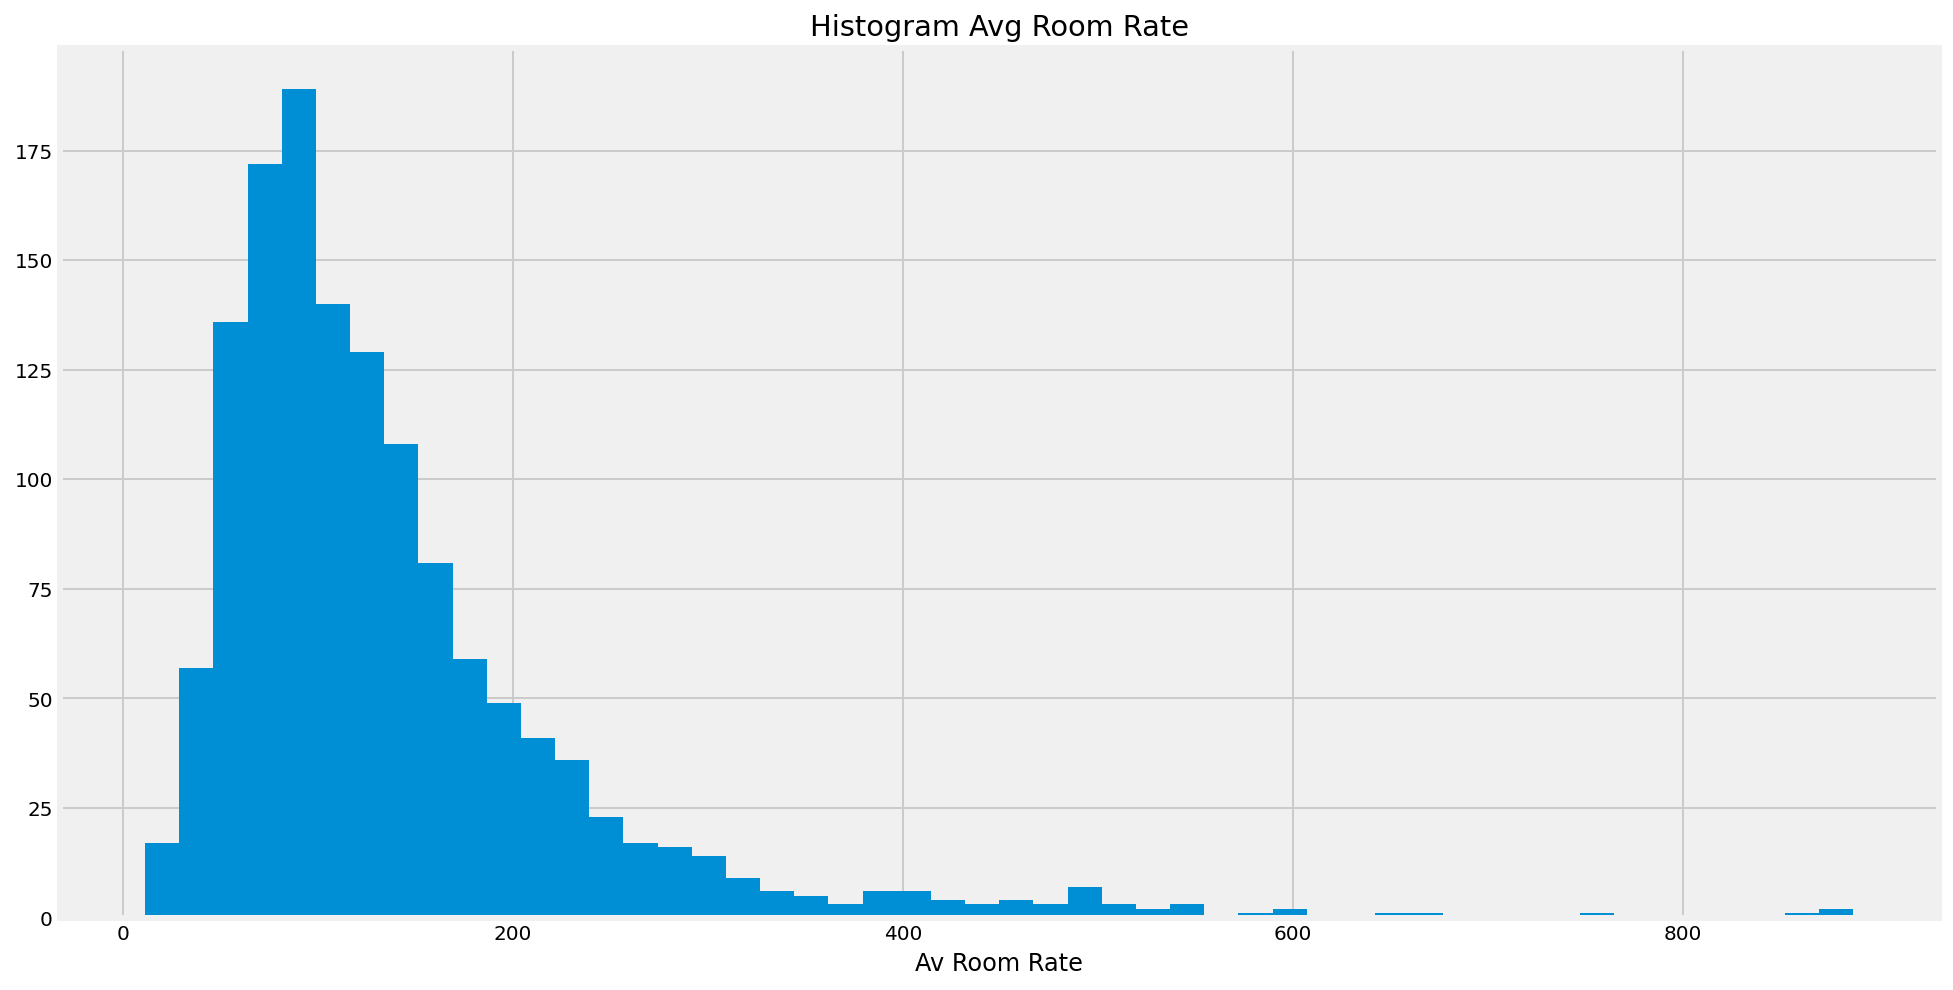

In [18]:
# plot histogram of average room rate across all hotels where value is provided - heavy skew to right
plt.figure(figsize=(15, 8))
plt.hist(df_hotel_dict.avg_room_rate[df_hotel_dict.avg_room_rate.notnull()], bins=50)
plt.title('Histogram Avg Room Rate')
plt.xlabel('Av Room Rate')
plt.show()

In [99]:
# average room rate
df_hotel_dict.avg_room_rate.mean()

139.1798084008843

In [100]:
# medium room rate
df_hotel_dict.avg_room_rate.median()

113.0

In [102]:
# Top 5 hotels by av. room rate
df_hotel_dict[df_hotel_dict.avg_room_rate.notnull()].sort_values(by='avg_room_rate',ascending=False)[['hotel_name', 'avg_room_rate']].head()

,hotel_name,avg_room_rate
995,Valet Apartments Bruges Place Camden Lodging R...,887.5
1152,"Regents Park One Apartments Reviews, London",886.0
951,Stamford Street Apartments Specialty Inn Revie...,864.5
61,"Mandarin Oriental Hyde Park, London Hotel Reviews",751.5
372,Four Seasons Hotel London at Ten Trinity Squar...,671.5


In [30]:
# pearson correlation between features and avg_review_score
df_hotel_dict.drop('Unnamed: 0', axis=1).corr()['avg_review_score']

avg_review_score          1.000000
num_reviews               0.226911
num_reviews_english       0.236855
approx_time_scrape_hrs    0.236855
avg_room_rate             0.202732
Name: avg_review_score, dtype: float64

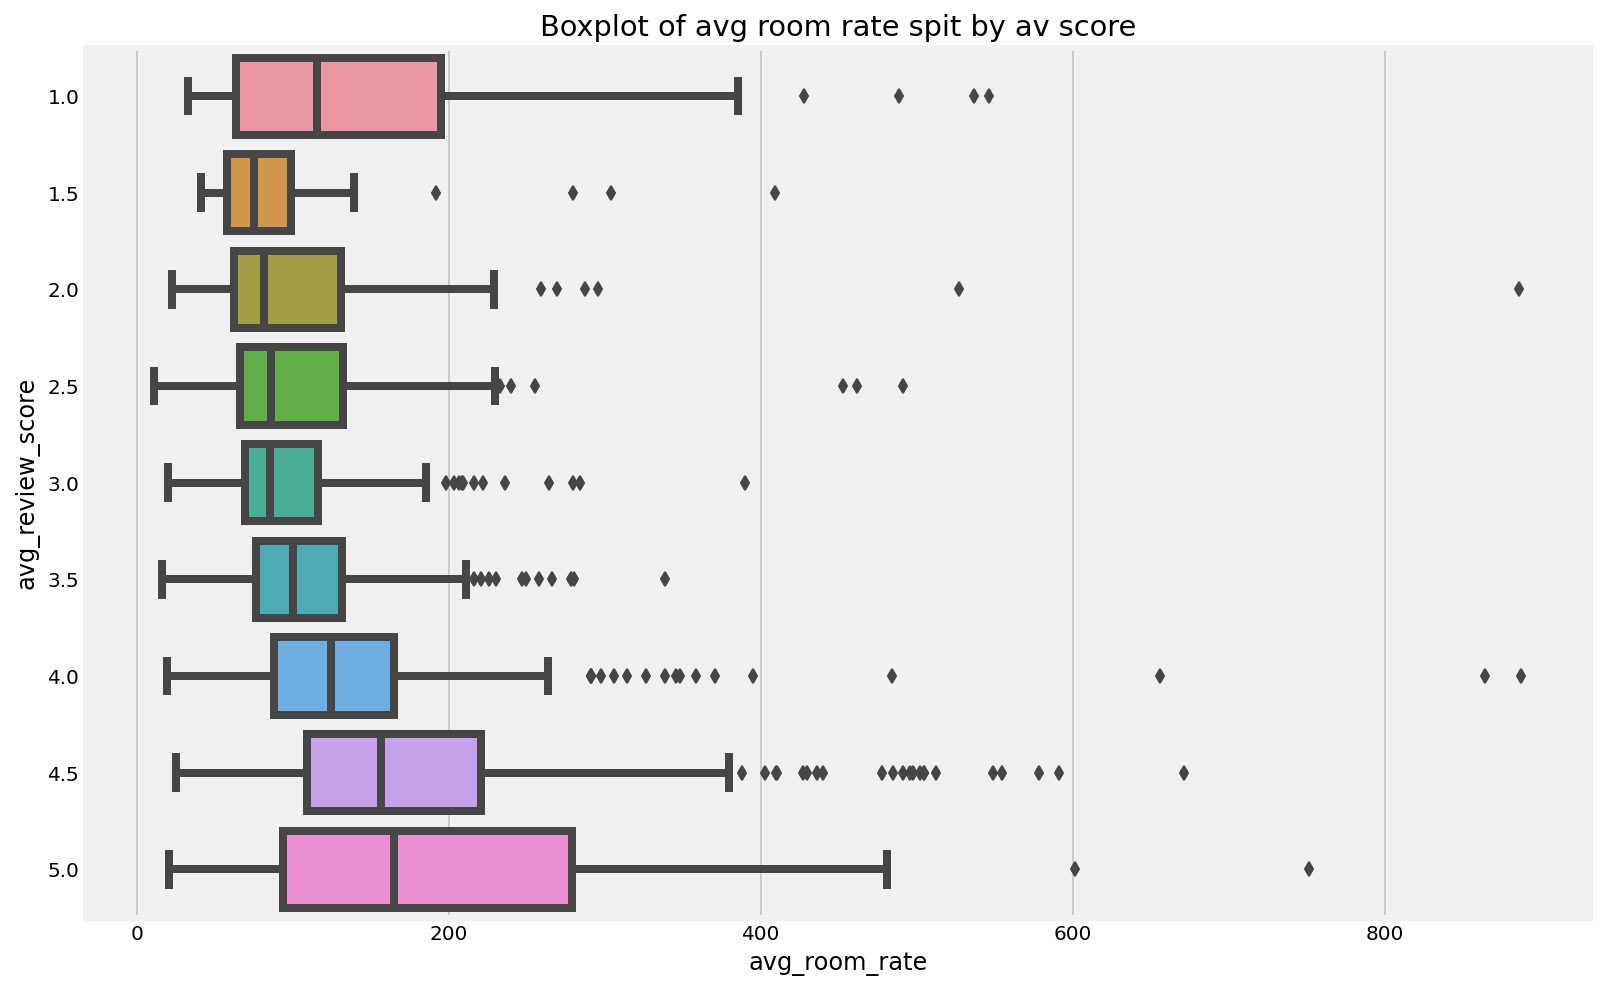

In [31]:
# boxplot average room rate split by average review score
df_score_rate = df_hotel_dict[['avg_review_score', 'avg_room_rate']].dropna()
plt.figure(figsize=(12, 8))
sns.boxplot(x='avg_room_rate', y='avg_review_score', data=df_score_rate, orient='h')
plt.title('Boxplot of avg room rate split by av score')
plt.show()

In [20]:
# convert star rating to float
df_hotel_dict.star_rating = df_hotel_dict.star_rating.apply(lambda x : np.nan if x == 'None' else float(x))

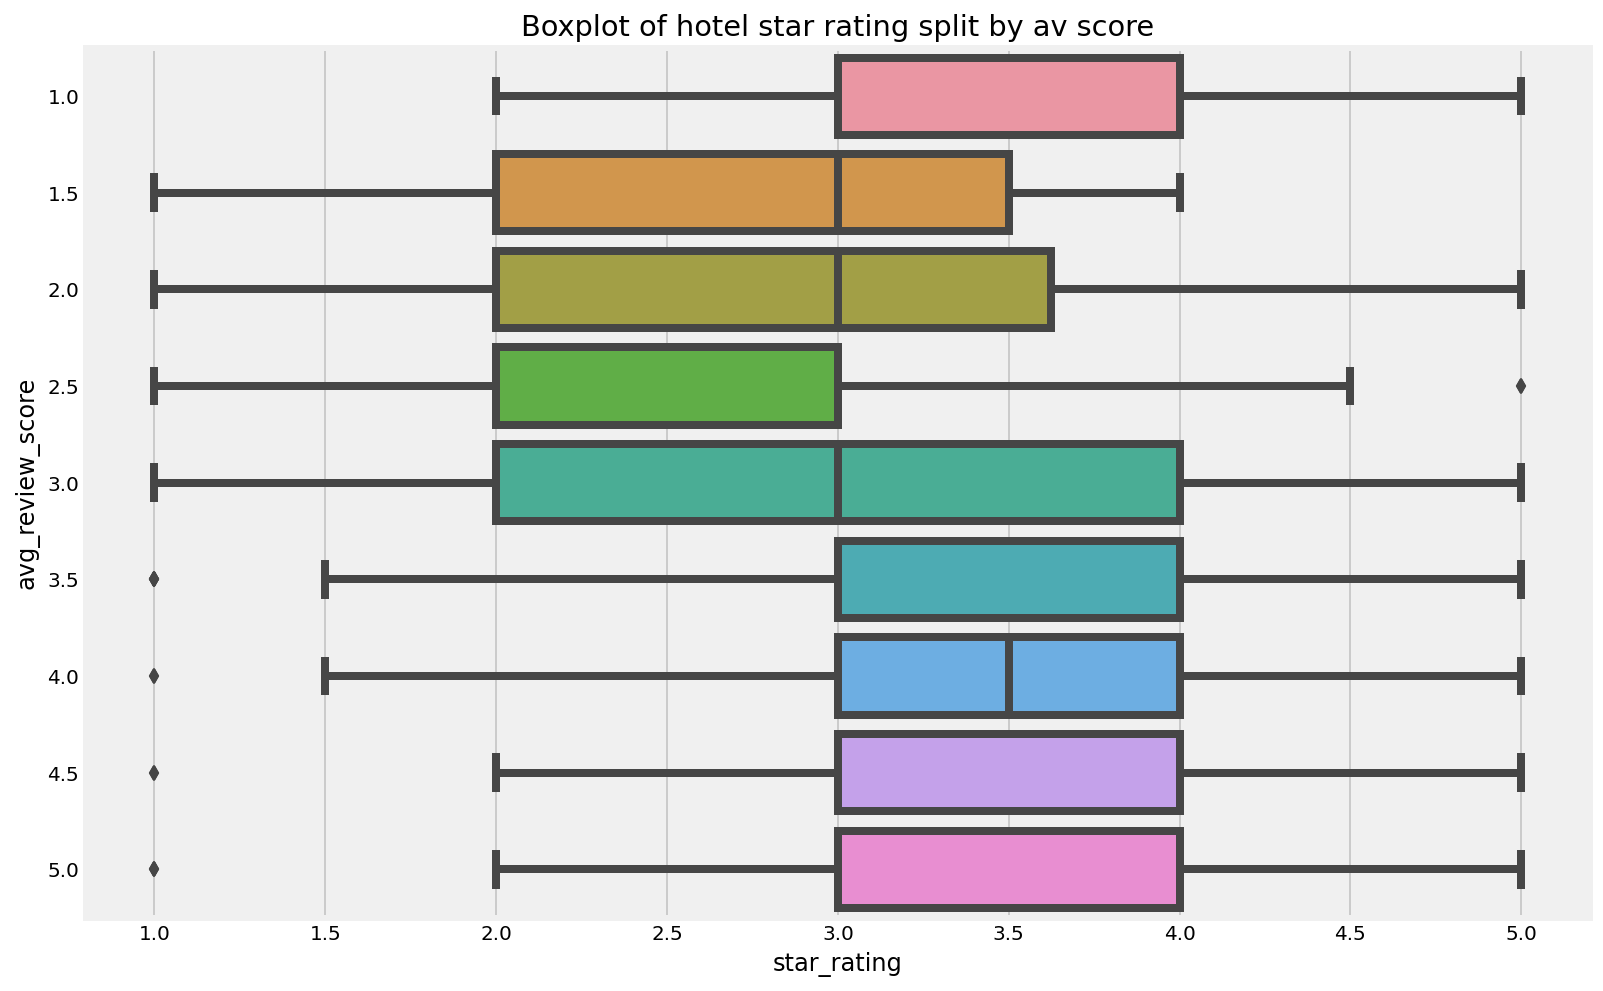

In [21]:
# boxplot hotel star rating split by average review score
df_score_star = df_hotel_dict[['avg_review_score', 'star_rating']].dropna()
plt.figure(figsize=(12, 8))
sns.boxplot(x='star_rating', y='avg_review_score', data=df_score_star, orient='h')
plt.title('Boxplot of hotel star rating split by av score')
plt.show()

In [22]:
# correlation between av. review score and star_rating
df_hotel_dict.avg_review_score.corr(df_hotel_dict.star_rating)

0.2172182318435355

In [90]:
df_hotel_dict.groupby('avg_review_score')['star_rating'].agg(['mean', 'std', 'median'])

,mean,std,median
avg_review_score,,,
1.0,3.625000,0.752540,4.0
1.5,2.609756,0.996947,3.0
2.0,2.870192,0.960368,3.0
2.5,2.771845,0.912271,3.0
3.0,3.006536,0.833088,3.0
3.5,3.175000,0.854841,3.0
4.0,3.467836,0.770889,3.5
4.5,3.802521,0.770551,4.0
5.0,3.773913,0.937156,4.0
